# Clotting Pipeline

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [1]:
from fastai.vision import *

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [2]:
path = Path('clotting_images')

In [3]:
classes = ['clot','non_clot']

Then we can remove any images that can't be opened:

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View data
#check size, may need to be power of 7
#also, eventually create totally seperate validation set

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(do_flip = True, flip_vert=False, 
            max_rotate=0.0, max_zoom =1.0, max_lighting=0.1, max_warp=0.0, p_affine=0.0, 
            p_lighting=0.75), 
            size=(92,499), num_workers=4).normalize(imagenet_stats)

In [6]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [7]:
data.classes

['clot', 'non_clot']

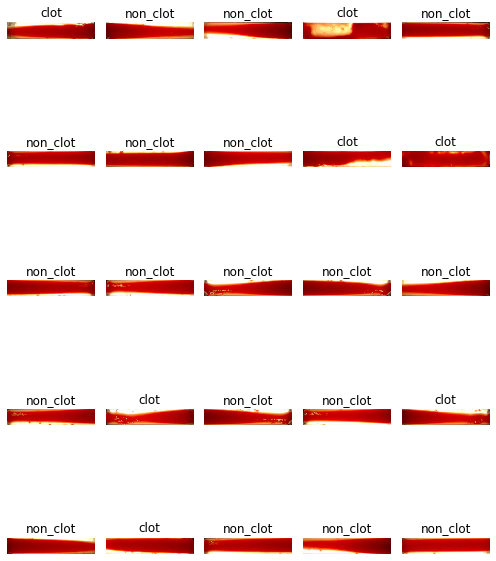

In [55]:
data.show_batch(rows=5, figsize=(7,10))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['clot', 'non_clot'], 2, 908, 227)

## Train model

In [28]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [29]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.298770,0.407330,0.889868,00:33
1,0.331145,1.613021,0.748899,00:30
2,0.246812,0.107114,0.969163,00:30
3,0.169072,0.107628,0.969163,00:29


In [35]:
learn.save('stage-1')

In [36]:
learn.unfreeze()

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


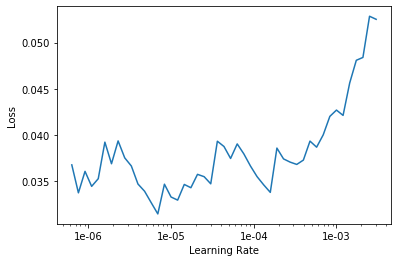

In [46]:
# If the plot is not showing try to give a start and end learning rate
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(4, max_lr=slice(2e-6,7e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.009360,0.060679,0.977974,00:30
1,0.011679,0.048995,0.982379,00:31
2,0.009068,0.051108,0.982379,00:31
3,0.012346,0.054542,0.982379,00:31


In [51]:
learn.save('stage-2')

SEE RESULTS

In [52]:
learn.load('stage-2');

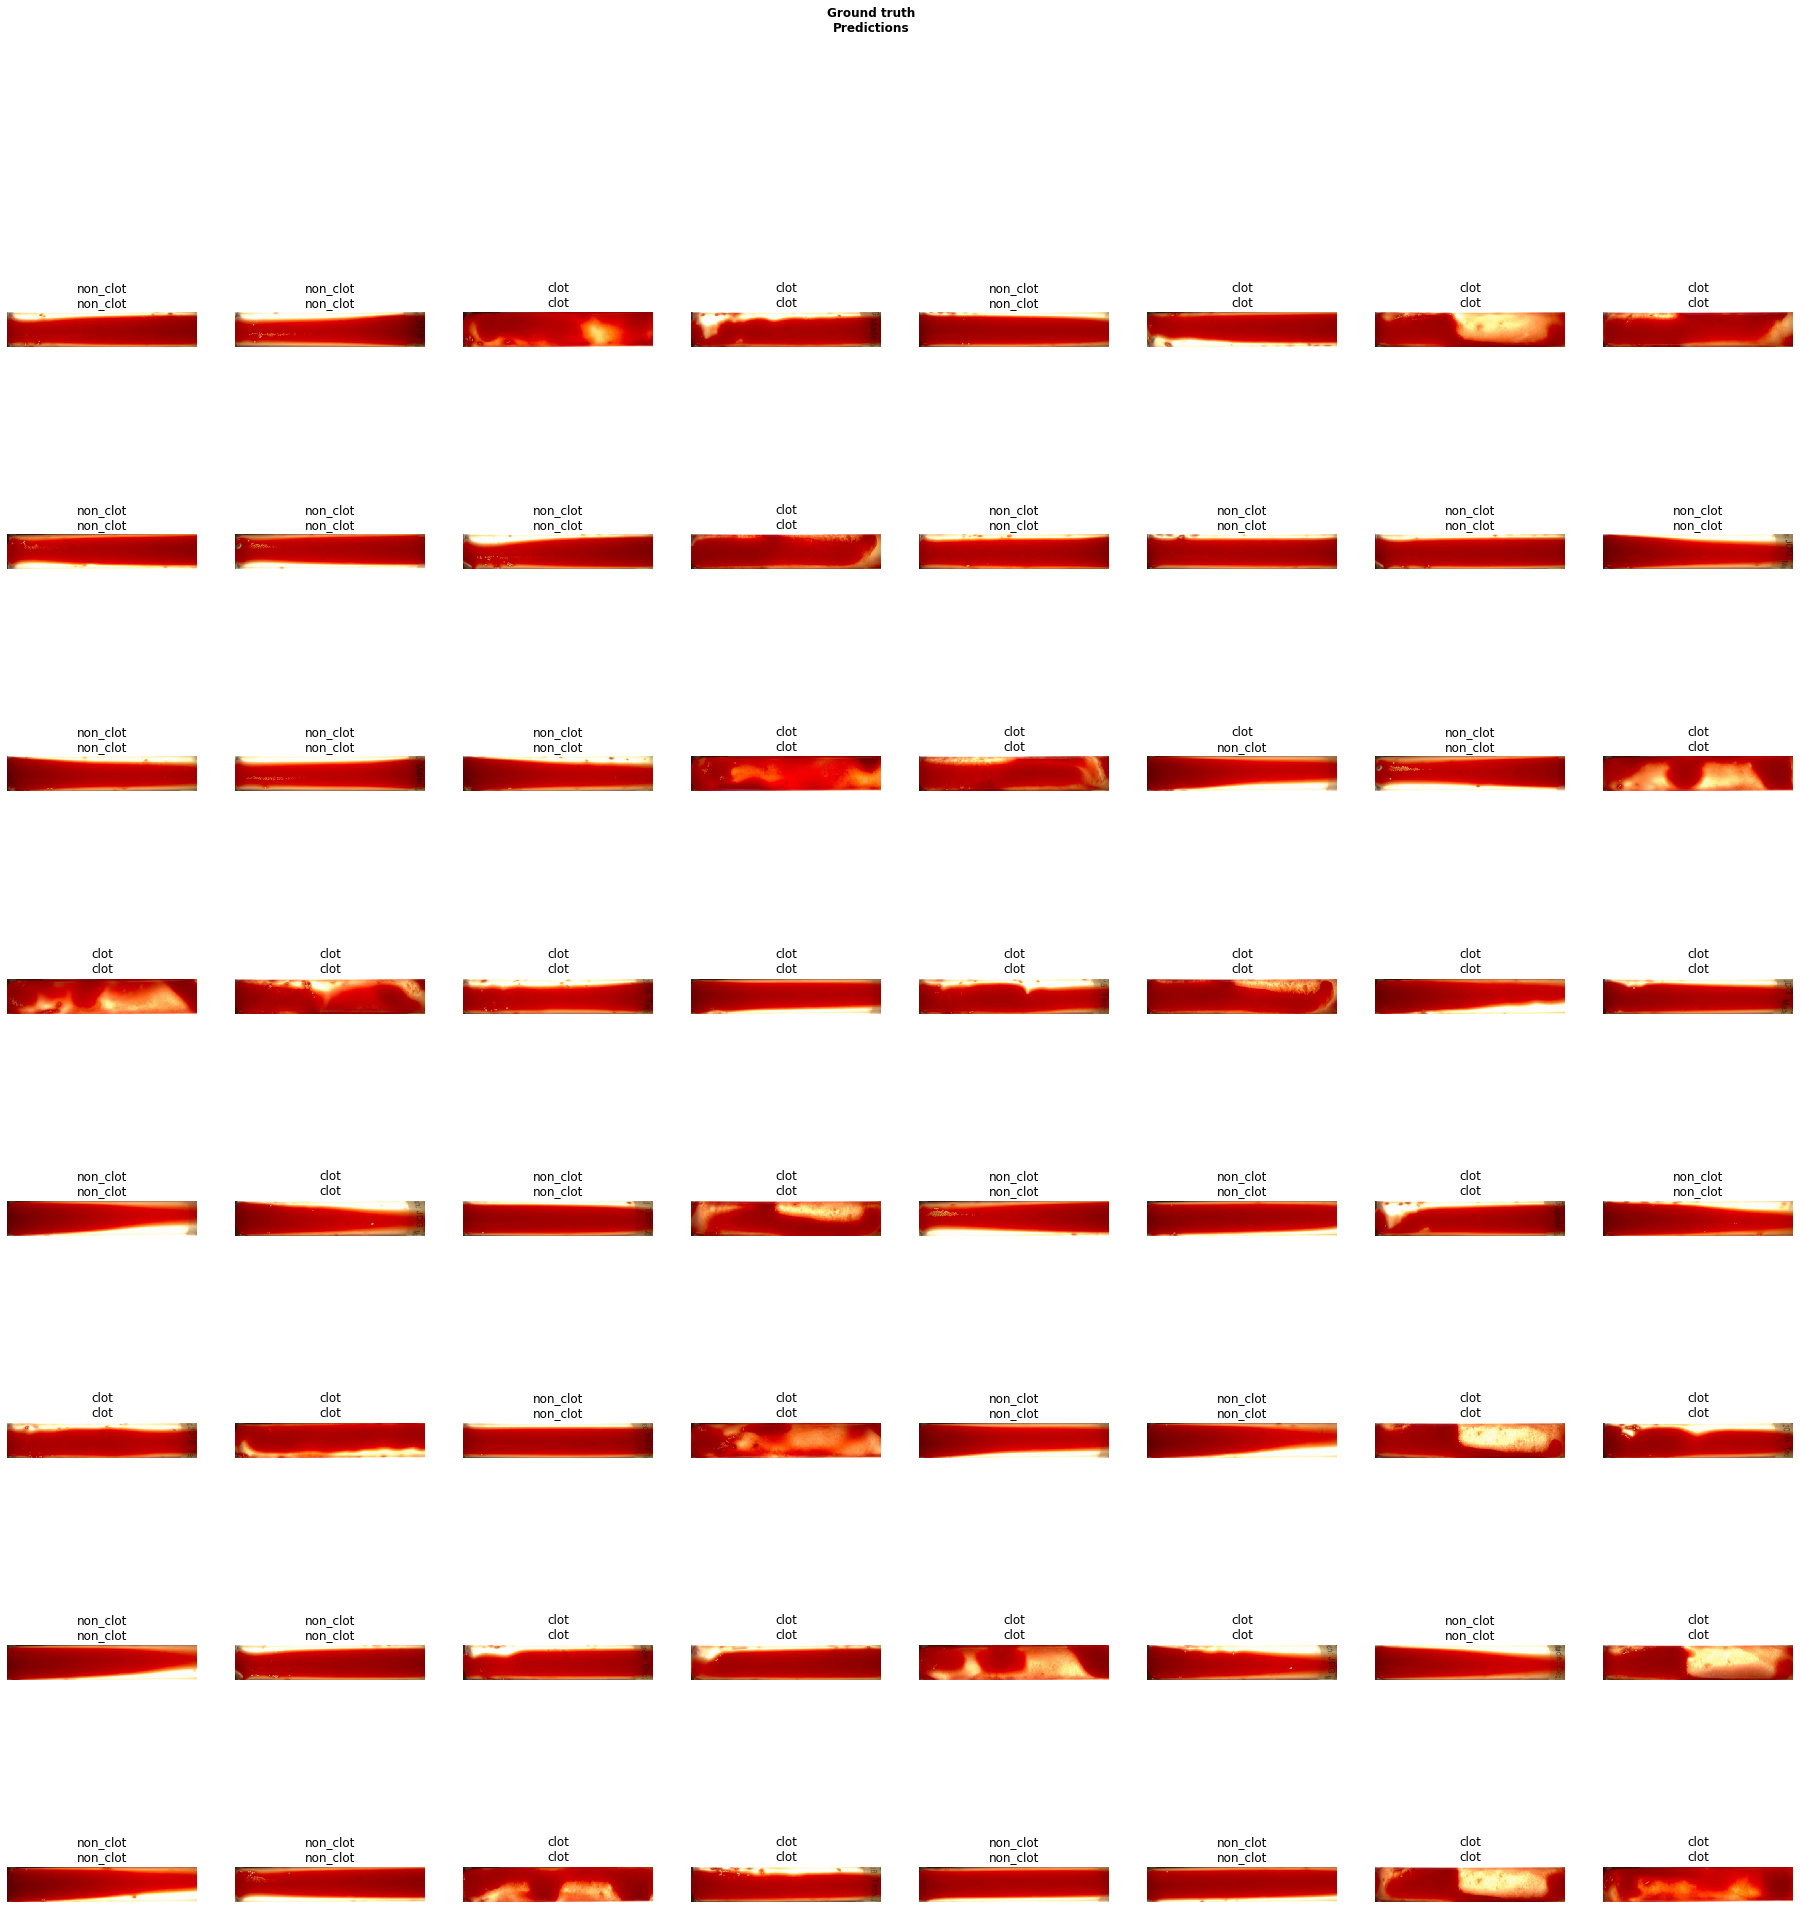

In [53]:
learn.show_results(rows = 10)

In [56]:
preds = learn.get_preds()
preds

[tensor([[4.3729e-04, 9.9956e-01],
         [1.4118e-09, 1.0000e+00],
         [1.0000e+00, 1.0170e-10],
         [1.0000e+00, 4.2040e-11],
         [2.4147e-06, 1.0000e+00],
         [1.0000e+00, 1.2872e-06],
         [9.9999e-01, 5.6343e-06],
         [1.0000e+00, 1.2796e-06],
         [9.5007e-08, 1.0000e+00],
         [1.5713e-07, 1.0000e+00],
         [2.7553e-08, 1.0000e+00],
         [1.0000e+00, 9.3030e-07],
         [4.7589e-08, 1.0000e+00],
         [5.6775e-06, 9.9999e-01],
         [3.0113e-07, 1.0000e+00],
         [5.9729e-02, 9.4027e-01],
         [3.1803e-07, 1.0000e+00],
         [1.5400e-07, 1.0000e+00],
         [1.8384e-06, 1.0000e+00],
         [1.0000e+00, 8.9202e-08],
         [1.0000e+00, 6.7433e-07],
         [5.9531e-02, 9.4047e-01],
         [7.8989e-07, 1.0000e+00],
         [1.0000e+00, 1.5488e-06],
         [1.0000e+00, 3.5320e-09],
         [1.0000e+00, 1.6327e-06],
         [1.0000e+00, 6.6175e-07],
         [5.4221e-01, 4.5779e-01],
         [1.0000e+00

## Interpretation

In [57]:
learn.load('stage-2');

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

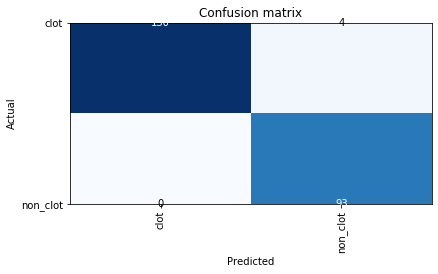

In [59]:
interp.plot_confusion_matrix()

CLEANUP

In [70]:
from fastai.widgets import *

In [68]:
#losses, idxs = interp.top_losses()
#top_loss_paths = data.valid_ds.x[idxs]

In [71]:
interp.plot_top_losses(9, figsize = (7, 10))

TypeError: _cl_int_plot_top_losses() got an unexpected keyword argument 'figsize'

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [24]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [38]:
#defaults.device = torch.device('cpu')

CREATE DATABUNCH THAT WILL TAKE IN TEST IMAGES AND TRANSFORM IN SAME MANNER

In [74]:
data2 = ImageDataBunch.single_from_classes(path, classes,
        ds_tfms=get_transforms(do_flip = True, flip_vert=False, 
            max_rotate=0.0, max_zoom =1.0, max_lighting=0.1, max_warp=0.0, p_affine=0.0, 
            p_lighting=0.75), 
            size=(92,499), num_workers=4).normalize(imagenet_stats)

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [ ]:
img = open_image(path/'black'/'00000021.jpg')
img

In [26]:
learn = load_learner(path)

AttributeError: 'Learner' object has no attribute 'opt'

In [75]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

NameError: name 'img' is not defined

In [46]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category non_clot

In [47]:
pred_class,pred_idx,outputs = learn.predict(img3)
pred_class

Category clot

In [48]:
pred_class,pred_idx,outputs = learn.predict(img4)
pred_class

Category clot

In [49]:
pred_class,pred_idx,outputs = learn.predict(img5)
pred_class

Category non_clot

ANALYZE LARGE BATCH TEST SET FROM 'TEST_IMAGES' FOLDER or 'clotting_test' for quicker working check

In [ ]:
learner = load_learner(path, test=ImageList.from_folder(path/'clotting_test'))

In [ ]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
preds

In [ ]:
learn.show_results()

In [ ]:
list = preds[:]

In [ ]:
non_clot_probability = [seq[1] for seq in list]

In [ ]:
print(non_clot_probability)

In [ ]:
new_list.plot()

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

### Learning rate (LR) too low

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [ ]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [ ]:
learn.fit_one_cycle(1)

### Too many epochs

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))